In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv("Klaviyo DS Screen 2.csv")







A) Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)


In [2]:
data1 = data.iloc[:,:-1]
data4 = data1.groupby(['customer_id','gender'])['customer_id'].count().reset_index(name  = 'tot_no')
data5 = data1.groupby(['customer_id','gender'])['date'].max().reset_index(name = 'max_date')
data5.merge(data4, on = ['customer_id','gender'])



,customer_id,gender,max_date,tot_no
0,1000,0,1/1/2017 0:11,1
1,1001,0,1/1/2017 0:29,1
2,1002,1,2/19/2017 21:35,3
3,1003,1,4/26/2017 2:37,4
4,1004,0,1/1/2017 3:11,1
...,...,...,...,...
8809,9809,1,12/31/2017 21:39,1
8810,9810,1,12/31/2017 22:16,1
8811,9811,1,12/31/2017 22:24,1
8812,9812,0,12/31/2017 23:01,1


B) Plot the count of orders per week.


In [3]:
import datetime
data['date'] = pd.to_datetime(data['date'])
data['week'] = data['date'].dt.week


In [4]:
dt = data.groupby("week")['value'].count().reset_index(name = 'count_orders')

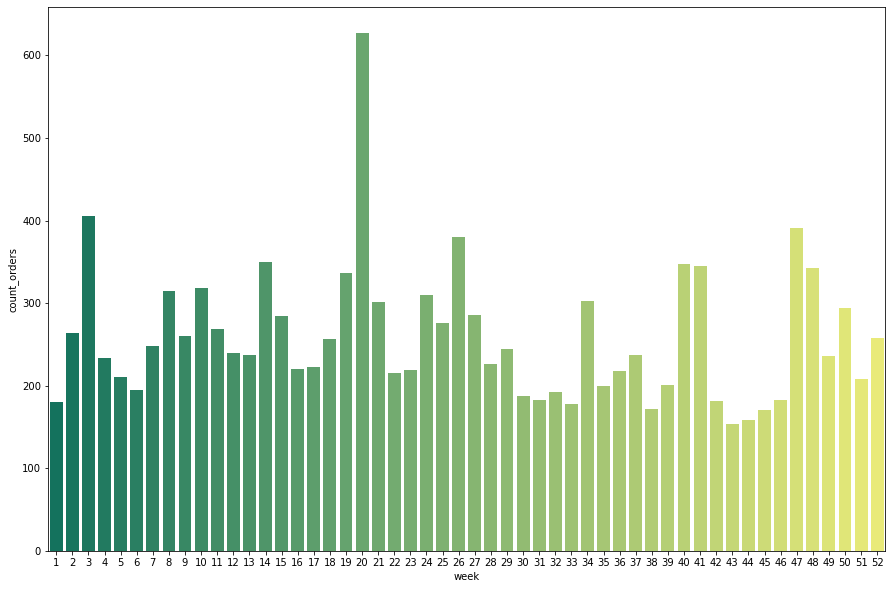

In [5]:
fig = plt.figure(figsize = (15,10))
sns.barplot(x = dt['week'],y = dt['count_orders'],palette = 'summer')

C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant

In [6]:
dw = data.groupby("gender")['value'].mean().reset_index(name = 'tot_value')

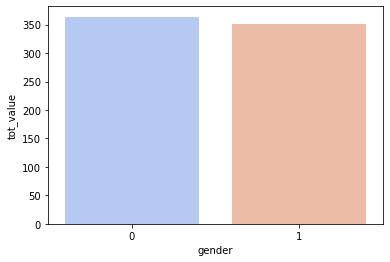

In [7]:
sns.barplot(x = dw['gender'],y = dw['tot_value'],palette= 'coolwarm')


There is not significant difference between the mean of the values of gender 0 and gender 1

D) which hour of the day has more traffic? Plot graph


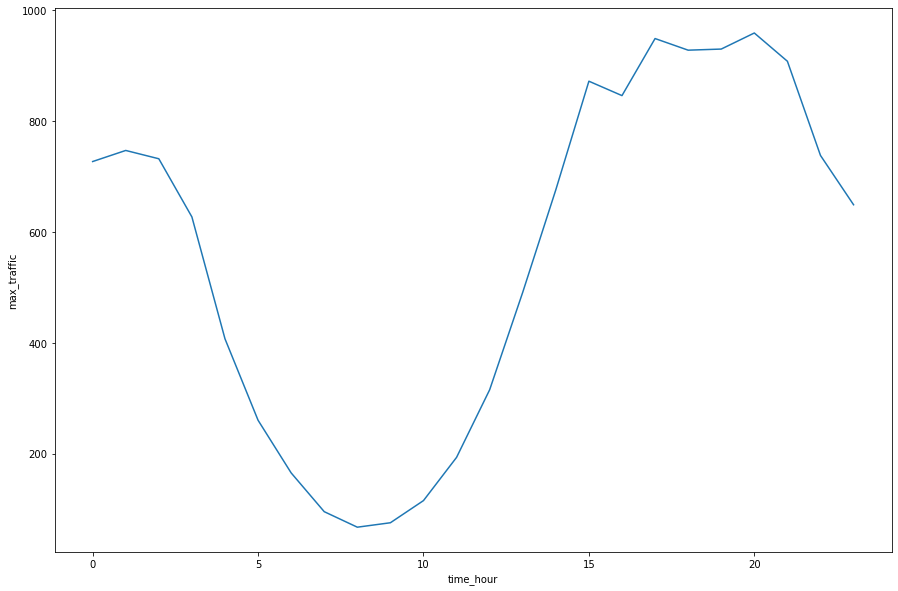

In [8]:
#import datetime as dt
# this line converts the string object in Timestamp object
#data['date'] = [datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%s") for d in data["date"]]
#dy['Time'] = dy['Time'].astype(str)
#dy
# extracting date from timestamp
#data['Date'] = [datetime.datetime.date(d) for d in data['date']] 

# extracting time from timestamp
#data['Time'] = [datetime.datetime.time(d) for d in data['date']] 

#data['Time'].dt.strftime('%H')

#plt.figure(figsize=(20,10))
#sns.lineplot(x= dy['Time'],y = dy['max_traffic'])
#plt.show()

def hr_func(ts):
    return ts.hour

data['time_hour'] = data['date'].apply(hr_func)


dy = data.groupby('time_hour')['time_hour'].count().reset_index(name = 'max_traffic')
dy
plt.figure(figsize=(15,10))
sns.lineplot(x= dy['time_hour'],y = dy['max_traffic'])
plt.show()




E) which day of the week has the highest revenue? Plot graph to show value for each week day


In [9]:
data['day'] = data['date'].dt.weekday

In [10]:
import datetime
data['date'] = pd.to_datetime(data['date'])
data['weekday'] = data['date'].dt.day_name()





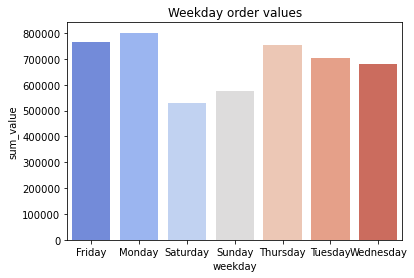

In [11]:
di= data.groupby("weekday")['value'].sum().reset_index(name = 'sum_value')
sns.barplot(x = di['weekday'],y = di['sum_value'],palette = 'coolwarm')
plt.savefig("weekday order values")
plt.title("Weekday order values")
plt.show()





F) What are the mean number of orders per customer per quarter? Plot graph with quarterly values


In [12]:
data

,customer_id,gender,date,value,week,time_hour,day,weekday
0,1000,0,2017-01-01 00:11:00,198.50,52,0,6,Sunday
1,1001,0,2017-01-01 00:29:00,338.00,52,0,6,Sunday
2,1002,1,2017-01-01 01:30:00,733.00,52,1,6,Sunday
3,1003,1,2017-01-01 01:34:00,772.00,52,1,6,Sunday
4,1004,0,2017-01-01 03:11:00,508.00,52,3,6,Sunday
...,...,...,...,...,...,...,...,...
13466,9810,1,2017-12-31 22:16:00,794.44,52,22,6,Sunday
13467,9811,1,2017-12-31 22:24:00,148.60,52,22,6,Sunday
13468,9812,0,2017-12-31 23:01:00,153.00,52,23,6,Sunday
13469,9813,0,2017-12-31 23:11:00,534.00,52,23,6,Sunday


In [13]:
data['Quarter'] = data['date'].dt.quarter

In [14]:
data['Quarter']

0        1
1        1
2        1
3        1
4        1
        ..
13466    4
13467    4
13468    4
13469    4
13470    4
Name: Quarter, Length: 13471, dtype: int64

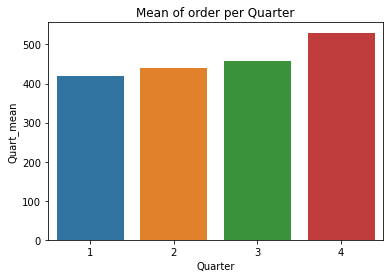

In [28]:
du = data.groupby(["customer_id","Quarter"])['value'].sum().reset_index(name = 'Quart_value')
td = du.groupby("Quarter")['Quart_value'].mean().reset_index(name = 'Quart_mean')
sns.barplot(x = td['Quarter'], y = td['Quart_mean'])
plt.title("Mean of order per Quarter")
plt.show()

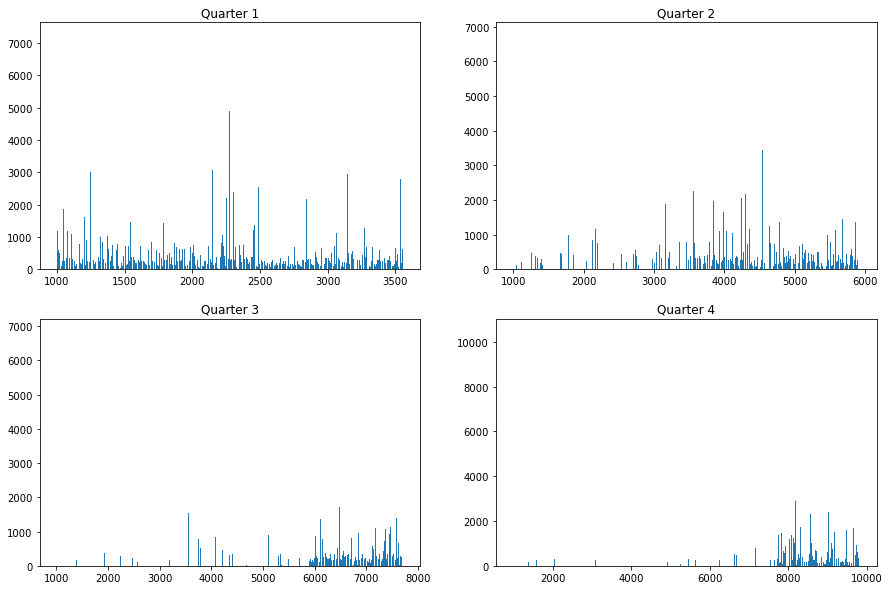

In [16]:
fig,ax = plt.subplots(2,2,figsize = (15,10))
# for first quarter
de = du[du['Quarter'] == 1]
ax[0][0].bar(de['customer_id'],de['Quart_value'])
ax[0][0].set_title("Quarter 1")

# for second quarter
de = du[du['Quarter'] == 2]
ax[0][1].bar(de['customer_id'],de['Quart_value'])
ax[0][1].set_title("Quarter 2")

# for third quarter
de = du[du['Quarter'] == 3]
ax[1][0].bar(de['customer_id'],de['Quart_value'])
ax[1][0].set_title("Quarter 3")


# for fourth quarter
de = du[du['Quarter'] == 4]
ax[1][1].bar(de['customer_id'],de['Quart_value'])
ax[1][1].set_title("Quarter 4")

plt.show()

G) Plot distribution (histogram) of order values, use bin size of 50.

In [17]:
w = 50
bin_size = (data['value'].max() - data['value'].min())/50
n = int(bin_size)

<function matplotlib.pyplot.show(*args, **kw)>

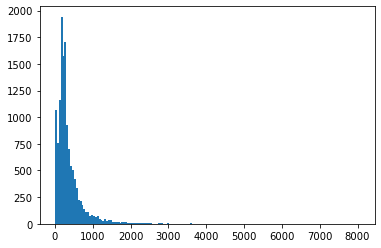

In [18]:
plt.hist(data['value'],bins = n)
plt.show